Best Period: 58, Best Return: 1.88%, Trade: 624
Worst Period: 5, Worst Return: -8.98%, Trade: 2670


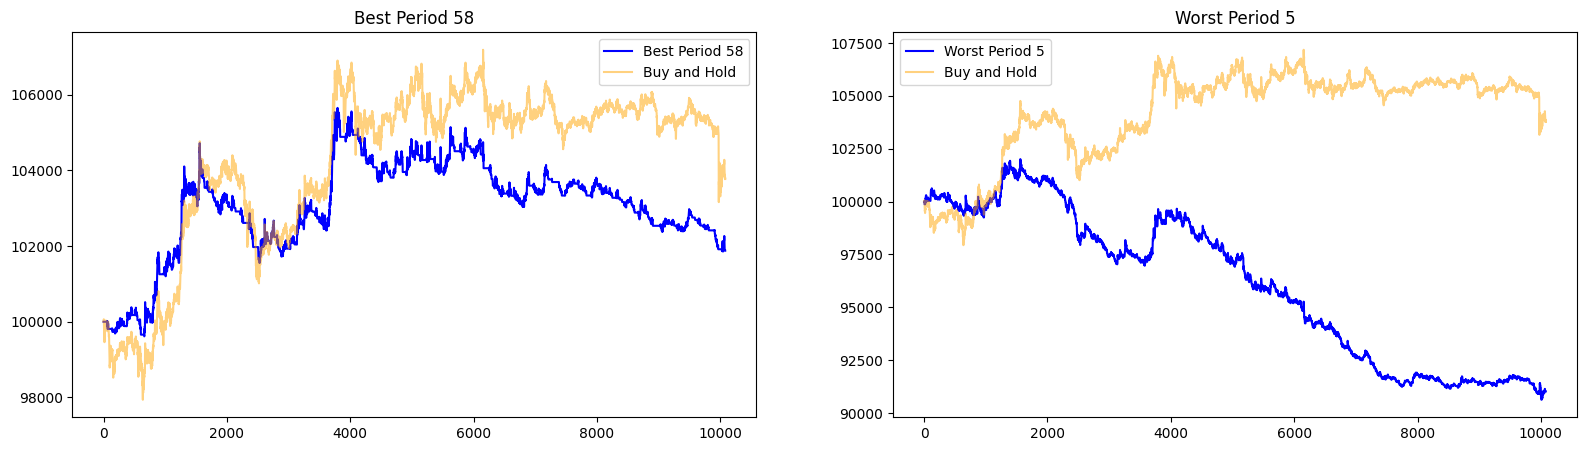

Buy and Hold Return: 3.77%


In [1]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data

#df = pd.read_csv('btcusdt_1m_1219.csv')
df = pd.read_csv('btcusdt_1m_1225.csv')
#df = pd.read_csv('btcusdt_5m_1219.csv')

def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst returns
best_return = -np.inf
worst_return = np.inf
best_period = None
worst_period = None

for period in range(2, 500):

    usdt = 100000
    btc = 0
    holding = False
    capital_history = []
    commission = 0.00003
    trade = 0

    df['signal'] = 0
    df['ma'] = talib.SMA(df['Close'].values, timeperiod=period)
    df.loc[period:, 'signal'] = np.where(df['Close'][period:] > df['ma'][period:], 1, 0)
    df['position'] = df['signal'].diff()

    for i in range(len(df)):
        if df['position'][i] == 1 and not holding:  # Buy
            btc = usdt / df['Close'][i] * (1 - commission)
            usdt = 0
            holding = True  # Deduct commission from capital
            trade += 1
        elif df['position'][i] == -1 and holding:  # Sell
            usdt = btc * df['Close'][i] * (1 - commission)
            btc = 0  # Deduct commission from capital
            holding = False
            trade += 1
        capital_history.append(calc_capital(i))
    total_return = (capital_history[-1] - 100000) / 100000

    # Update best and worst returns and periods
    if total_return > best_return:
        best_return = total_return
        best_period = period
        best_capital_history = capital_history.copy()
        best_trade_amount = trade  # Copy the capital history for the best period
    if total_return < worst_return:
        worst_return = total_return
        worst_period = period
        worst_capital_history = capital_history.copy()
        worst_trade_amount = trade  # Copy the capital history for the worst period

# Print the results
print(f"Best Period: {best_period}, Best Return: {best_return:.2%}, Trade: {best_trade_amount}")
print(f"Worst Period: {worst_period}, Worst Return: {worst_return:.2%}, Trade: {worst_trade_amount}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']

plt.figure(figsize=(30, 5))

# Best strategy subplot
plt.subplot(1, 3, 1)
plt.plot(best_capital_history, label=f'Best Period {best_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Best Period {best_period}')
plt.legend()

# Worst strategy subplot
plt.subplot(1, 3, 2)
plt.plot(worst_capital_history, label=f'Worst Period {worst_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Worst Period {worst_period}')
plt.legend()

plt.show()

# Print the 'buy and hold' return
buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")


Best Period: 190, Best Return: 5.06%, Trade: 338
Worst Period: 6, Worst Return: -7.11%, Trade: 2394


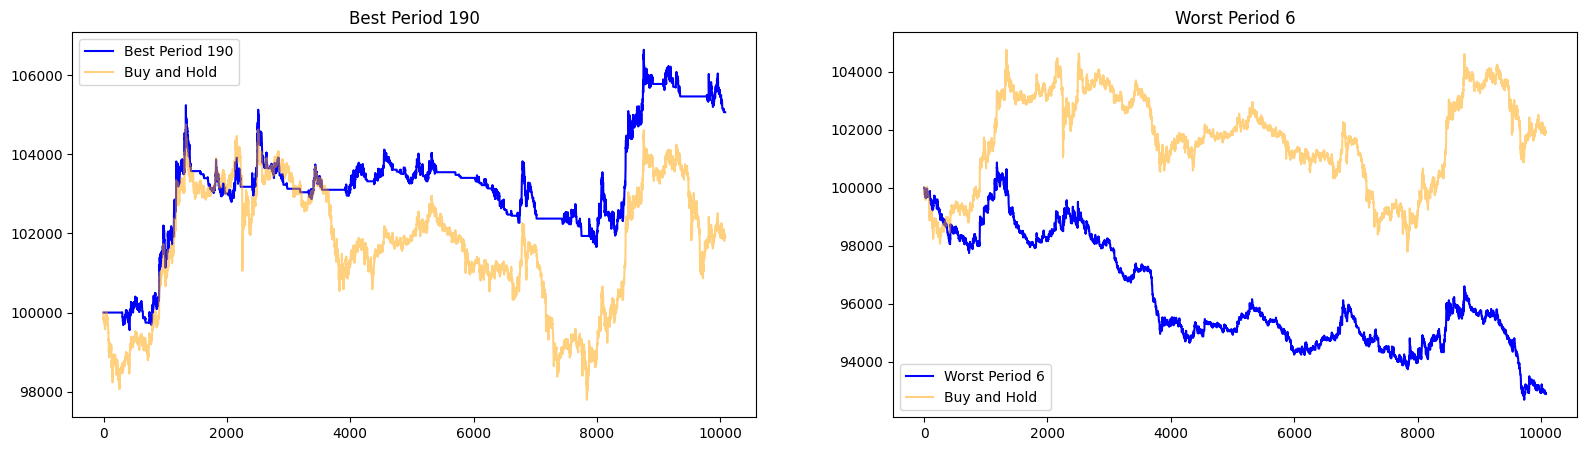

Buy and Hold Return: 1.91%


In [2]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data

df = pd.read_csv('btcusdt_1m_1219.csv')
#df = pd.read_csv('btcusdt_1m_1225.csv')
#df = pd.read_csv('btcusdt_5m_1219.csv')

def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst returns
best_return = -np.inf
worst_return = np.inf
best_period = None
worst_period = None

for period in range(2, 500):

    usdt = 100000
    btc = 0
    holding = False
    capital_history = []
    commission = 0.00003
    trade = 0

    df['signal'] = 0
    df['ma'] = talib.SMA(df['Close'].values, timeperiod=period)
    df.loc[period:, 'signal'] = np.where(df['Close'][period:] > df['ma'][period:], 1, 0)
    df['position'] = df['signal'].diff()

    for i in range(len(df)):
        if df['position'][i] == 1 and not holding:  # Buy
            btc = usdt / df['Close'][i] * (1 - commission)
            usdt = 0
            holding = True  # Deduct commission from capital
            trade += 1
        elif df['position'][i] == -1 and holding:  # Sell
            usdt = btc * df['Close'][i] * (1 - commission)
            btc = 0  # Deduct commission from capital
            holding = False
            trade += 1
        capital_history.append(calc_capital(i))
    total_return = (capital_history[-1] - 100000) / 100000

    # Update best and worst returns and periods
    if total_return > best_return:
        best_return = total_return
        best_period = period
        best_capital_history = capital_history.copy()
        best_trade_amount = trade  # Copy the capital history for the best period
    if total_return < worst_return:
        worst_return = total_return
        worst_period = period
        worst_capital_history = capital_history.copy()
        worst_trade_amount = trade  # Copy the capital history for the worst period

# Print the results
print(f"Best Period: {best_period}, Best Return: {best_return:.2%}, Trade: {best_trade_amount}")
print(f"Worst Period: {worst_period}, Worst Return: {worst_return:.2%}, Trade: {worst_trade_amount}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']

plt.figure(figsize=(30, 5))

# Best strategy subplot
plt.subplot(1, 3, 1)
plt.plot(best_capital_history, label=f'Best Period {best_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Best Period {best_period}')
plt.legend()

# Worst strategy subplot
plt.subplot(1, 3, 2)
plt.plot(worst_capital_history, label=f'Worst Period {worst_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Worst Period {worst_period}')
plt.legend()

plt.show()

# Print the 'buy and hold' return
buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")


Best Period: 498, Best Return: 16.53%, Trade: 135
Worst Period: 2, Worst Return: -9.47%, Trade: 4340


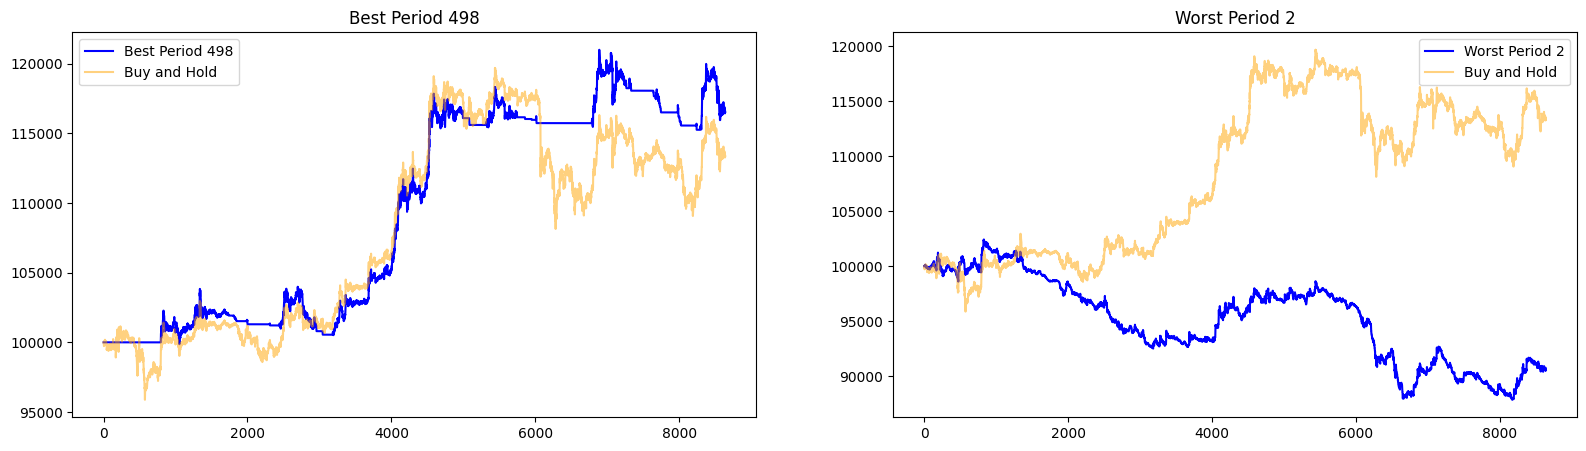

Buy and Hold Return: 13.36%


In [3]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data

#df = pd.read_csv('btcusdt_1m_1219.csv')
#df = pd.read_csv('btcusdt_1m_1225.csv')
df = pd.read_csv('btcusdt_5m_1219.csv')

def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst returns
best_return = -np.inf
worst_return = np.inf
best_period = None
worst_period = None

for period in range(2, 500):

    usdt = 100000
    btc = 0
    holding = False
    capital_history = []
    commission = 0.00003
    trade = 0

    df['signal'] = 0
    df['ma'] = talib.SMA(df['Close'].values, timeperiod=period)
    df.loc[period:, 'signal'] = np.where(df['Close'][period:] > df['ma'][period:], 1, 0)
    df['position'] = df['signal'].diff()

    for i in range(len(df)):
        if df['position'][i] == 1 and not holding:  # Buy
            btc = usdt / df['Close'][i] * (1 - commission)
            usdt = 0
            holding = True  # Deduct commission from capital
            trade += 1
        elif df['position'][i] == -1 and holding:  # Sell
            usdt = btc * df['Close'][i] * (1 - commission)
            btc = 0  # Deduct commission from capital
            holding = False
            trade += 1
        capital_history.append(calc_capital(i))
    total_return = (capital_history[-1] - 100000) / 100000

    # Update best and worst returns and periods
    if total_return > best_return:
        best_return = total_return
        best_period = period
        best_capital_history = capital_history.copy()
        best_trade_amount = trade  # Copy the capital history for the best period
    if total_return < worst_return:
        worst_return = total_return
        worst_period = period
        worst_capital_history = capital_history.copy()
        worst_trade_amount = trade  # Copy the capital history for the worst period

# Print the results
print(f"Best Period: {best_period}, Best Return: {best_return:.2%}, Trade: {best_trade_amount}")
print(f"Worst Period: {worst_period}, Worst Return: {worst_return:.2%}, Trade: {worst_trade_amount}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']

plt.figure(figsize=(30, 5))

# Best strategy subplot
plt.subplot(1, 3, 1)
plt.plot(best_capital_history, label=f'Best Period {best_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Best Period {best_period}')
plt.legend()

# Worst strategy subplot
plt.subplot(1, 3, 2)
plt.plot(worst_capital_history, label=f'Worst Period {worst_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Worst Period {worst_period}')
plt.legend()

plt.show()

# Print the 'buy and hold' return
buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")


Best Period: 190, Best Return: -0.11%, Trade: 406
Worst Period: 190, Worst Return: -0.11%, Trade: 406


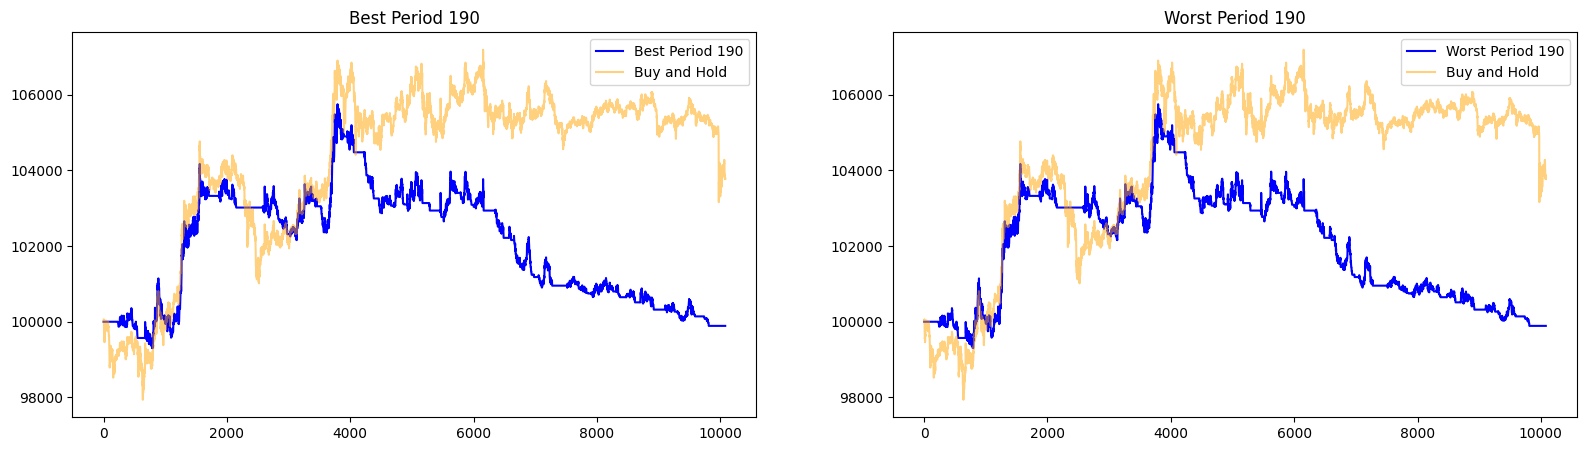

Buy and Hold Return: 3.77%


In [4]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

# Load your data

#df = pd.read_csv('btcusdt_1m_1219.csv')
df = pd.read_csv('btcusdt_1m_1225.csv')
#df = pd.read_csv('btcusdt_5m_1219.csv')

def calc_capital(index):
    return (usdt + btc * df['Close'][index])

# Initialize variables to track the best and worst returns
best_return = -np.inf
worst_return = np.inf
best_period = None
worst_period = None

for period in range(2, 5):
    period = 190
    usdt = 100000
    btc = 0
    holding = False
    capital_history = []
    commission = 0.00003
    trade = 0

    df['signal'] = 0
    df['ma'] = talib.SMA(df['Close'].values, timeperiod=period)
    df.loc[period:, 'signal'] = np.where(df['Close'][period:] > df['ma'][period:], 1, 0)
    df['position'] = df['signal'].diff()

    for i in range(len(df)):
        if df['position'][i] == 1 and not holding:  # Buy
            btc = usdt / df['Close'][i] * (1 - commission)
            usdt = 0
            holding = True  # Deduct commission from capital
            trade += 1
        elif df['position'][i] == -1 and holding:  # Sell
            usdt = btc * df['Close'][i] * (1 - commission)
            btc = 0  # Deduct commission from capital
            holding = False
            trade += 1
        capital_history.append(calc_capital(i))
    total_return = (capital_history[-1] - 100000) / 100000

    # Update best and worst returns and periods
    if total_return > best_return:
        best_return = total_return
        best_period = period
        best_capital_history = capital_history.copy()
        best_trade_amount = trade  # Copy the capital history for the best period
    if total_return < worst_return:
        worst_return = total_return
        worst_period = period
        worst_capital_history = capital_history.copy()
        worst_trade_amount = trade  # Copy the capital history for the worst period

# Print the results
print(f"Best Period: {best_period}, Best Return: {best_return:.2%}, Trade: {best_trade_amount}")
print(f"Worst Period: {worst_period}, Worst Return: {worst_return:.2%}, Trade: {worst_trade_amount}")

# After loading the data, calculate 'buy and hold' equity curve
initial_btc_for_hold = 100000 / df['Close'][0]
df['hold_value'] = initial_btc_for_hold * df['Close']

plt.figure(figsize=(30, 5))

# Best strategy subplot
plt.subplot(1, 3, 1)
plt.plot(best_capital_history, label=f'Best Period {best_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Best Period {best_period}')
plt.legend()

# Worst strategy subplot
plt.subplot(1, 3, 2)
plt.plot(worst_capital_history, label=f'Worst Period {worst_period}', color='blue')
plt.plot(df['hold_value'], label='Buy and Hold', color='orange', alpha=0.5)  # Adding the buy and hold curve
plt.title(f'Worst Period {worst_period}')
plt.legend()

plt.show()

# Print the 'buy and hold' return
buy_and_hold_return = (df['hold_value'].iloc[-1] - 100000) / 100000
print(f"Buy and Hold Return: {buy_and_hold_return:.2%}")
